# Support Vector Machines

## Unsupervised Classification using Iris data

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets
import numpy as np
import pandas as pd


iris = datasets.load_iris()

**Step 1:** Create function to estimate division between possible classes:

In [2]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

svc = svm.SVC(kernel='linear')

**Step 2:** Create function to establish X and y, fit the support vector machine, and create graph for each combination of features and each combination of flowers:

setosa vs versicolor, sepal length (cm) vs petal length (cm)


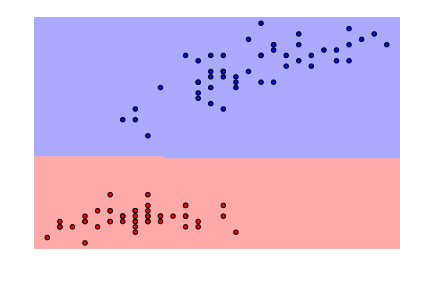

In [3]:
def set_vs_ver_plot_generator(a, b):
    X = iris.data[0:100, [a,b]]
    y = iris.target[0:100]
    svc.fit(X, y)
    plot_estimator(svc, X, y)
    print iris.target_names[0] + ' vs ' + iris.target_names[1] + ', ' + \
          iris.feature_names[a] + ' vs ' + iris.feature_names[b]

set_vs_ver_plot_generator(0,2)

setosa vs versicolor, sepal length (cm) vs petal width (cm)


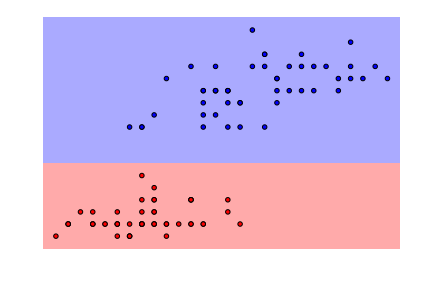

In [4]:
set_vs_ver_plot_generator(0,3)

setosa vs versicolor, sepal width (cm) vs petal length (cm)


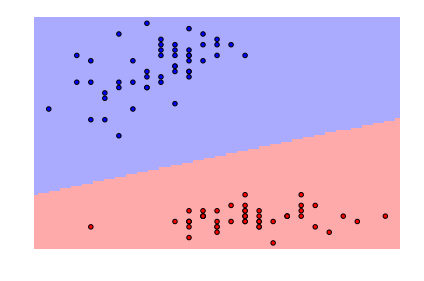

In [5]:
set_vs_ver_plot_generator(1,2)

setosa vs versicolor, sepal width (cm) vs petal width (cm)


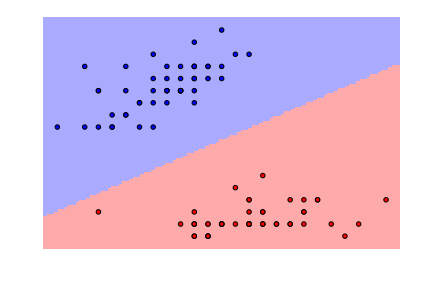

In [6]:
set_vs_ver_plot_generator(1,3)

versicolor vs virginica, sepal length (cm) vs petal length (cm)


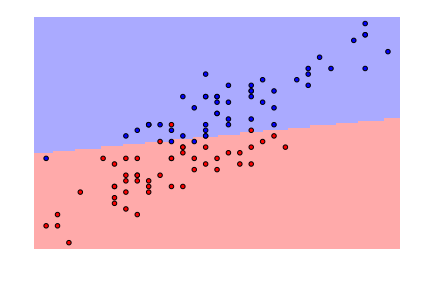

In [7]:
def ver_vs_vir_plot_generator(a, b):
    X = iris.data[50:150, [a,b]]
    y = iris.target[50:150]
    svc.fit(X, y)
    plot_estimator(svc, X, y)
    print iris.target_names[1] + ' vs ' + iris.target_names[2] + ', ' + \
          iris.feature_names[a] + ' vs ' + iris.feature_names[b]

ver_vs_vir_plot_generator(0,2)

versicolor vs virginica, sepal length (cm) vs petal width (cm)


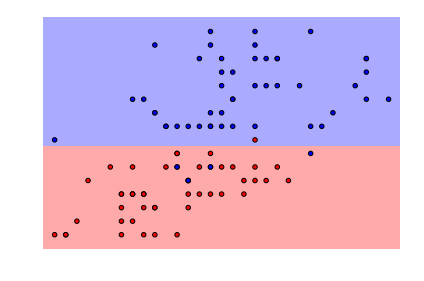

In [8]:
ver_vs_vir_plot_generator(0,3)

versicolor vs virginica, sepal width (cm) vs petal length (cm)


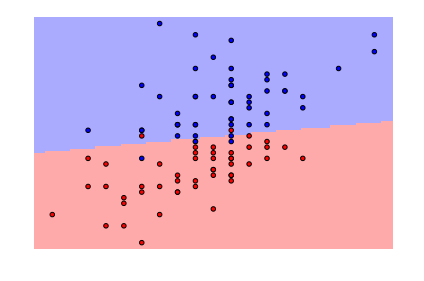

In [9]:
ver_vs_vir_plot_generator(1,2)

versicolor vs virginica, sepal width (cm) vs petal width (cm)


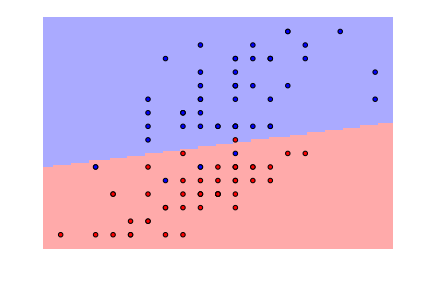

In [10]:
ver_vs_vir_plot_generator(1,3)

setosa vs virginica, sepal length (cm) vs petal length (cm)


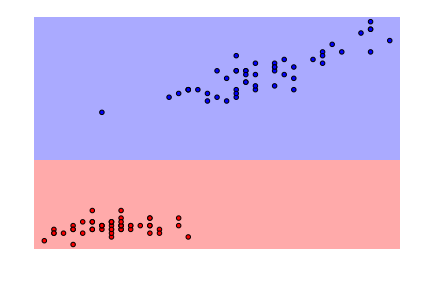

In [11]:
def set_vs_vir_plot_generator(a, b):
    X = np.concatenate((iris.data[0:50, [a,b]],iris.data[100:150, [a,b]]))
    y = np.concatenate((iris.target[0:50], iris.target[100:150]))
    svc.fit(X, y)
    plot_estimator(svc, X, y)
    print iris.target_names[0] + ' vs ' + iris.target_names[2] + ', ' + \
          iris.feature_names[a] + ' vs ' + iris.feature_names[b]

set_vs_vir_plot_generator(0,2)

setosa vs virginica, sepal length (cm) vs petal width (cm)


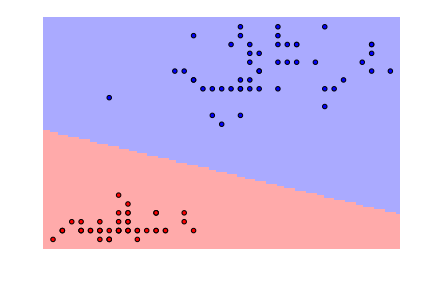

In [12]:
set_vs_vir_plot_generator(0,3)

setosa vs virginica, sepal width (cm) vs petal length (cm)


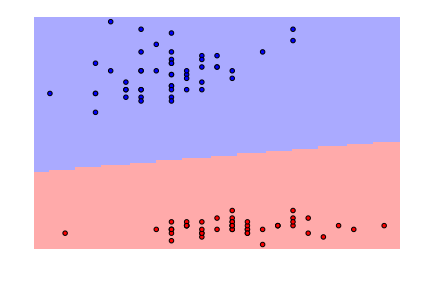

In [13]:
set_vs_vir_plot_generator(1,2)

setosa vs virginica, sepal width (cm) vs petal width (cm)


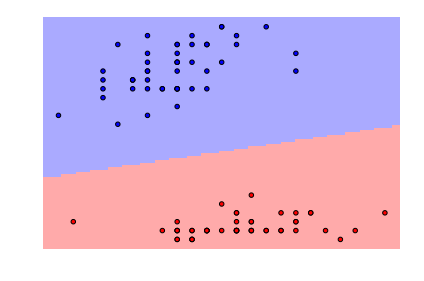

In [14]:
set_vs_vir_plot_generator(1,3)

**Step 3:** Develop code to classify three flowers at a time:

sepal length (cm) vs petal length (cm)


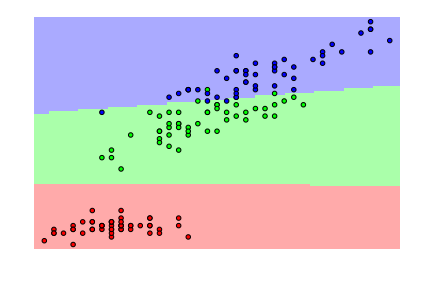

In [16]:
def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

svc = svm.SVC(kernel='linear')

def three_flower_plot_generator(a, b):
    X = iris.data[0:150, [a,b]]
    y = iris.target[0:150]
    svc.fit(X, y)
    plot_estimator(svc, X, y)
    print iris.feature_names[a] + ' vs ' + iris.feature_names[b]

three_flower_plot_generator(0,2)

**Step 4:** Soften the boundary in the support vector machine to deal with the possibility of overfitting or being overly sensitive to a handful of influential observations:

sepal length (cm) vs petal length (cm)


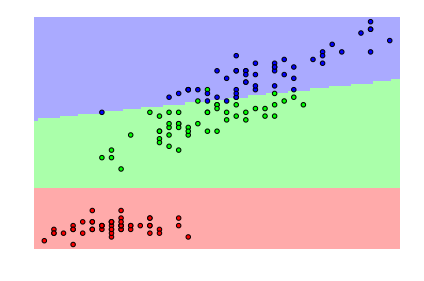

In [19]:
svc = svm.SVC(kernel='linear', C=50)
three_flower_plot_generator(0,2)